<a href="https://colab.research.google.com/github/yashpatil454/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Modify approach \ revise this
* refer almabetter chart flow \ revise this
* word cloud
* write conclusion \ revise this
Write down the accuracy improvement by different approaches (class imbalance, lemmetization, PCA if implemented)

# <b><u> Project Title : NLP Sentiment Analysis : Coronavirus Tweet Sentiment Analysis</u></b>

##Project Type: Classification

## <b> Problem Description </b>

### Coronavirus Tweet Sentiment Analysis NLP project aims to classify tweets related to Coronavirus into three categories: negative, neutral, and positive using natural language processing techniques such as sentiment analysis, text classification, and machine learning algorithms. The goal is to gain a better understanding of the overall sentiment of tweets related to Coronavirus and how it is changing over time, and also identify any trending topics or concerns related to Coronavirus that may be of particular concern to the public. Data visualization tools will be used to present the results in an easily understandable format, making it useful for public health officials, researchers, and other stakeholders in the fight against the pandemic.

## <b> Data Description </b>

### <b>Coronavirus Tweets.csv </b> - tweets data


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Username - coded Username
* #### ScreenName - coded ScreenName
* #### Location - Region of origin
* #### TweetAt - Tweet Timing
* #### OriginalTweet - First tweet in the thread
* #### Sentiment-Target variable - Sentiment of the tweet

###Github link: https://github.com/yashpatil454/Coronavirus-Tweet-Sentiment-Analysis

##Approach
* ### Problem Description
* ### Data Collection and Preprocessing
      - Importing important libraries and modules
      - Understanding the Data
      - Data Cleaning
      - Missing Data Handling
* ### Exploratory Data Analysis
      - EDA with Observations
* ### Feature Engineering
      - Data Preprocessing
      - Lemmatization
      - Handling Class Imbalance
      - Vectorization
* ### Modeling
      - Train Test Split
      - Logistic Regression Model
      - Random Forest Model
      - Support Vector Classification
        - One Vs One Classifier
        - One Vs Rest Classifier
      - Multinomial Naive Bayes
* ### Model Performance and Evaluation
        - Visualizing Model Performances
* ### Conclusion and Recommendations

In [45]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import re 
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample
#Importing NLP libraries 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
#Importing ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#The default figure size to 8 inches by 5 inches and the figure resolution (dots per inch) to 100.
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
#Mounting drive and pulling the data.csv
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv', encoding='latin-1')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Understanding the Data

In [48]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [50]:
df.shape

(41157, 6)

In [51]:
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [52]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

###Handling missing data

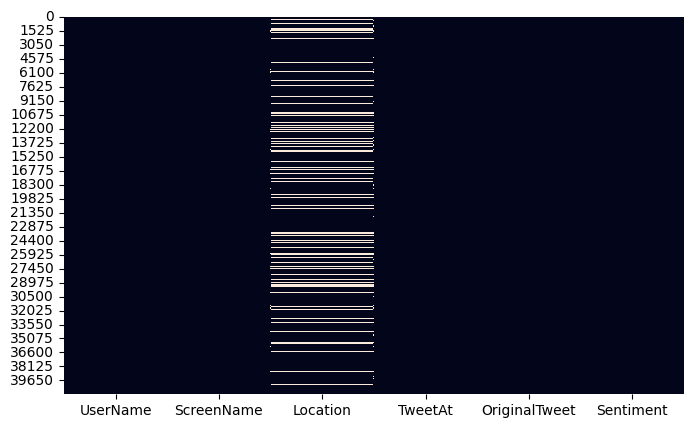

In [53]:
# Visualizing for null value in train_data
sns.heatmap(df.isnull(), cbar=False)

Observation: Only Location feature has null values that needs to be taken care of.

###Exploratory Data Analysis

In [54]:
# We want this classification to be 3-way so modifying sentiment column.
df['Sentiment'] = df['Sentiment'].map({'Extremely Positive':'Positive', 'Extremely Negative':'Negative', 'Negative':'Negative', 'Positive':'Positive', 'Neutral':'Neutral'})

In [55]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

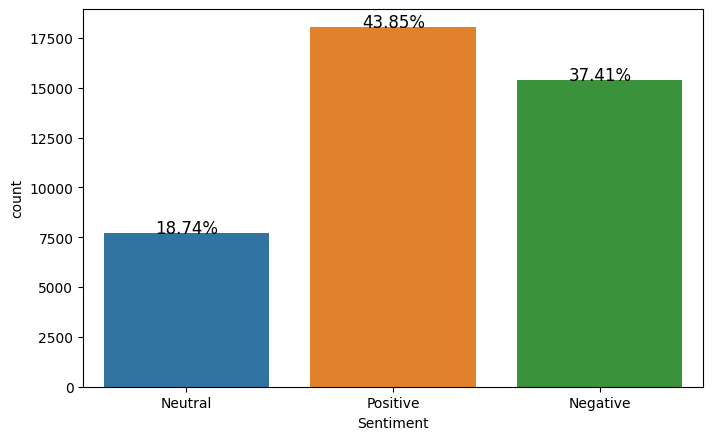

In [56]:
#Visualizing the sentiments count.
ax = sns.countplot(df['Sentiment'])

# Loop through each category and add percentage to bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(df)*100:.2f}%', (p.get_x()+0.25, p.get_height()), fontsize=12)

Observation: Here we can see that positive sentiment is 43.85%, negative sentiment is 37.41% and Neutral sentiment is 18.74% this will result in a class imbalance so we have to handle it.

Text(0, 0.5, 'Count')

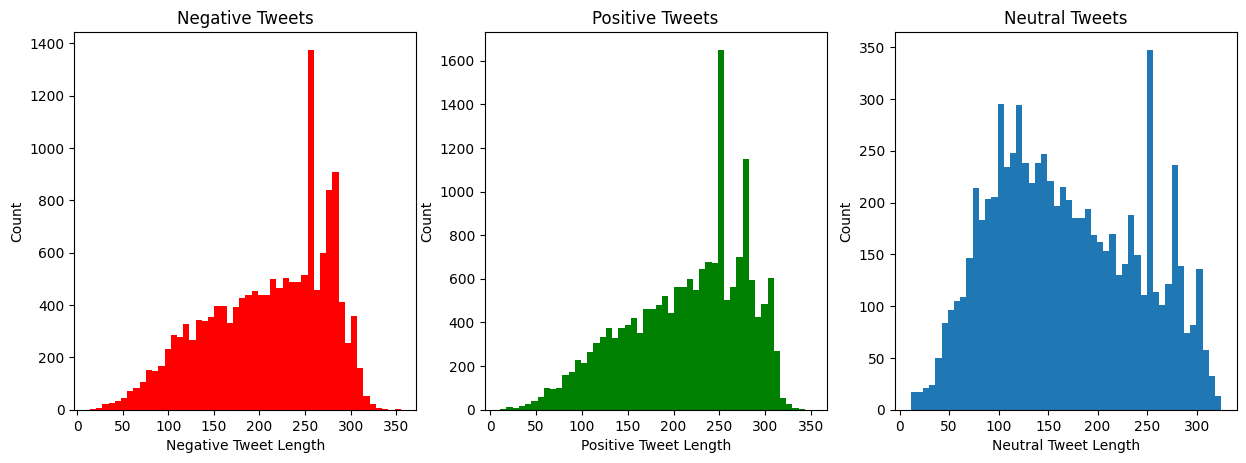

In [57]:
#Visualizing Character Frequency Count in each of the sentiment
neg = df[df['Sentiment']=='Negative']['OriginalTweet'].str.len()
pos = df[df['Sentiment']=='Positive']['OriginalTweet'].str.len()
neu = df[df['Sentiment']=='Neutral']['OriginalTweet'].str.len()

fig, axs = plt.subplots(1, 3, figsize=(15,5))

n = axs[0].hist(neg, bins = 50, color = 'red')
axs[0].set_title("Negative Tweets")
axs[0].set_xlabel("Negative Tweet Length")
axs[0].set_ylabel("Count")

p = axs[1].hist(pos, bins = 50, color = 'green')
axs[1].set_title("Positive Tweets")
axs[1].set_xlabel("Positive Tweet Length")
axs[1].set_ylabel("Count")

nu = axs[2].hist(neu, bins = 50)
axs[2].set_title("Neutral Tweets")
axs[2].set_xlabel("Neutral Tweet Length")
axs[2].set_ylabel("Count")

Observation: Visualizing character frequency counts can provide insights into the language and style of tweets with different sentiments, can be used as a preprocessing step for text data, can be used as a feature in machine learning models, can be used to identify outliers and anomalies in the text data, and can be used to understand the context

Text(0.5, 1.0, 'Neutral Tweets')

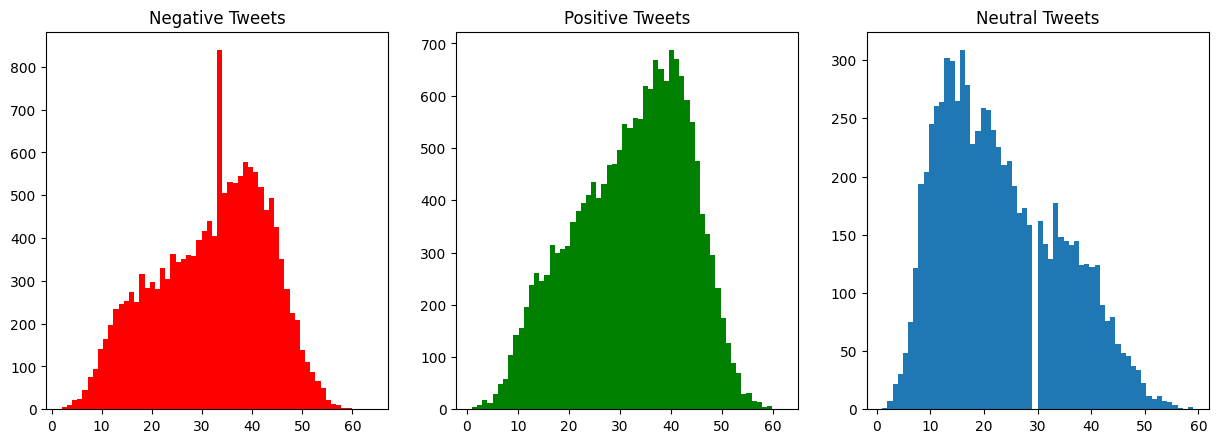

In [58]:
#Visualizing Word Count Distribution in each of the sentiment
neg = df[df['Sentiment']=='Negative']['OriginalTweet'].str.split().map(lambda x: len(x))
pos = df[df['Sentiment']=='Positive']['OriginalTweet'].str.split().map(lambda x: len(x))
neu = df[df['Sentiment']=='Neutral']['OriginalTweet'].str.split().map(lambda x: len(x))

fig, axs = plt.subplots(1, 3, figsize=(15,5))

n = axs[0].hist(neg, bins = 60, color = 'red')
axs[0].set_title("Negative Tweets")

p = axs[1].hist(pos, bins = 60, color = 'green')
axs[1].set_title("Positive Tweets")

nu = axs[2].hist(neu, bins = 60)
axs[2].set_title("Neutral Tweets")

Observation: Visualizing Word Count Distribution is showing to make tweets sentiment positive or negative the requirement of words is more and on the other hand neutral tweets have comparatively less no of words as the histogram plot is positively skewed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

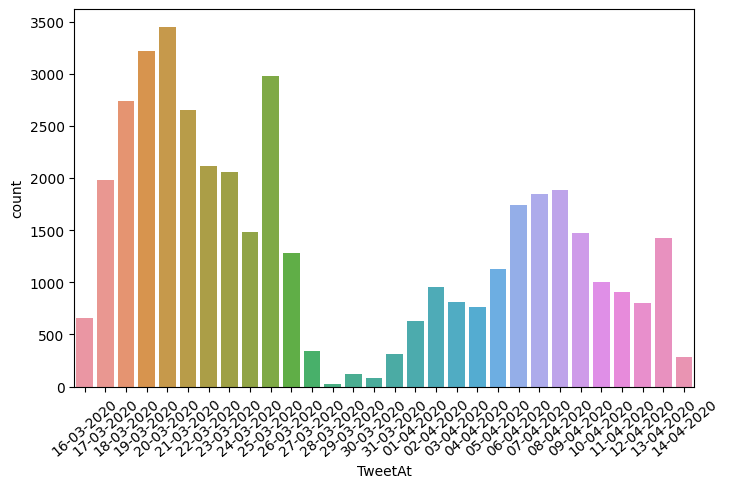

In [59]:
#Visualizing on which dates number of tweets are more.
sns.countplot(x='TweetAt', data=df)
plt.xticks(rotation=40)

Observation: Here we can see on 23rd march and 8th April a spike in the count of tweets. This can be a caused by any factors like major news break or any factor that can effect the mass population.

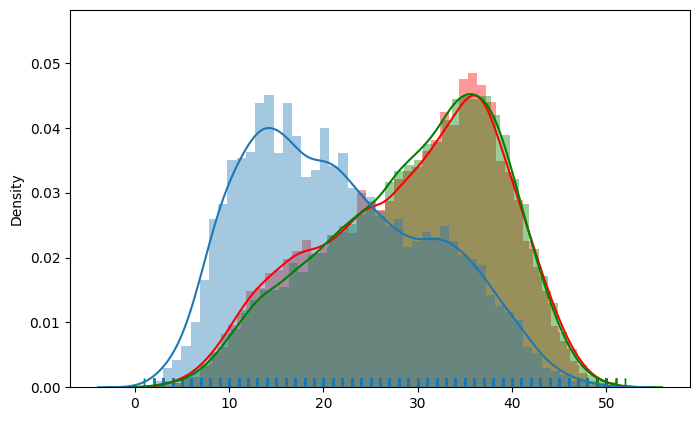

In [60]:
#Visualizing Unique Word Count in each of the sentiment
neg = df[df['Sentiment']=='Negative']['OriginalTweet'].apply(lambda x: len(set(str(x).split()))).to_list()
pos = df[df['Sentiment']=='Positive']['OriginalTweet'].apply(lambda x: len(set(str(x).split()))).to_list()
neu = df[df['Sentiment']=='Neutral']['OriginalTweet'].apply(lambda x: len(set(str(x).split()))).to_list()

sns.distplot(neg, rug=True,  bins = 50, color='red')
sns.distplot(pos, rug=True,  bins = 50, color='green')
sns.distplot(neu, rug=True, bins = 50)
plt.show()

Observation: Unique word counts can provide insights into the vocabulary and language used in tweets with different sentiments. For example, you may notice that tweets with a negative sentiment and positive sentiment use more unique words compared to tweets with a neutral sentiment.

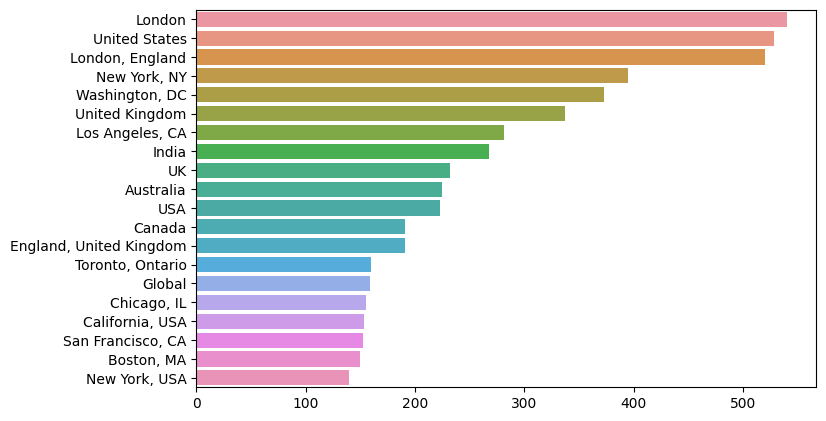

In [61]:
# Visualizing which Locations have high number of tweets on coronavirus.
# Get the top 20 locations by value count
top_20_locations = df['Location'].value_counts()[:20]
# Create the bar plot
sns.barplot(x=top_20_locations.values, y=top_20_locations.index)

Observation: Here we can see countries and states all in the location feature so taking a intimation that countries like USA, England, India and etc. are tweeting about coronivirus on a large number.

In [62]:
#Dropping the Location column.
df.drop(columns ='Location', inplace = True)

Observation: There were almost approx. 9000 observations that consisted of Null values in the location feature so dropping the feature as it is not serving any major role in sentiment anlysis. But visualizing it gave us an intimation from which locations the tweets were originated. 



###Data manipulation & Preprocessing

In [63]:
#Writing a function to process the tweets to remove URLs, HTML Links, Numbers, Stop words, punctuations and etc.
def preprocessing(text):

  #Removing Urls links
  text = re.compile(r'https?://\S+|www\.\S+').sub(r'', text)
  #Removing HTML tags
  text = re.compile(r'<.*?>').sub(r'',text)
  #Removing numbers
  text = re.sub(r'\d+', '', text)
  #Removing mentions 
  text = re.sub(r'@\w+','',text)
  #Removing hashtags
  text = re.sub(r'#\w+','',text)
  #Removing punctuations
  text = re.sub(r"[^\w\s\d]","", text)
  #Removing any extra white space which would be left while cleaning the data
  text = re.sub(r"\s+"," ",text).strip()

  return text

In [64]:
#Calling the preprocessing function to clean the tweets.
df['cleaned_tweet'] = df['OriginalTweet'].apply(lambda x:preprocessing(x))

###Removing Stopwords

In [65]:
sentences = stopwords.words('english')
print(sentences)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [66]:
# function to remove stop words
def remove_stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [67]:
# Removing stop words
df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_stopwords)

###Lemmatization

Lemmatization is the process of reducing a word to its base or root form. Lemmatization takes into account the context and part of speech of the word, and uses a dictionary or a morphological analyzer to find the base form of the word.

In [68]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [69]:
# Lemmatizing the cleaned_tweet column
df['cleaned_tweet'] = lemmatize_verbs(df['cleaned_tweet'])

In [70]:
#Dropping the OriginalTweet column as we have extracted all the info that we needed
df.drop(columns=['OriginalTweet'], inplace = True)

In [71]:
#Checking for the expected changes
df.head(10)

,UserName,ScreenName,TweetAt,Sentiment,cleaned_tweet
0,3799,48751,16-03-2020,Neutral,
1,3800,48752,16-03-2020,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,16-03-2020,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,16-03-2020,Positive,food stock one empty please dont panic enough ...
4,3803,48755,16-03-2020,Negative,ready go supermarket outbreak im paranoid food...
5,3804,48756,16-03-2020,Positive,news regionâs first confirmed covid case came ...
6,3805,48757,16-03-2020,Positive,cashier grocery store sharing insights prove c...
7,3806,48758,16-03-2020,Neutral,supermarket today didnt buy toilet paper
8,3807,48759,16-03-2020,Positive,due covid retail store classroom atlanta open ...
9,3808,48760,16-03-2020,Negative,corona preventionwe stop buy things cash use o...


###Handling Class Imbalance

In [72]:
# Separate majority and minority classes
df_majority_positive = df[df.Sentiment=='Positive']
df_minority_negative = df[df.Sentiment=='Negative']
df_minority_neutral = df[df.Sentiment=='Neutral']

# Upsample minority negative class
df_minority_negative_upsampled = resample(df_minority_negative, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority_positive),    # to match majority class
                                 random_state=123) # reproducible results

# Upsample minority neutral class
df_minority_neutral_upsampled = resample(df_minority_neutral, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority_positive),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority_positive, df_minority_negative_upsampled, df_minority_neutral_upsampled])
 
# Shuffle data
df = df_upsampled.sample(frac=1).reset_index(drop=True)

# Display new class counts
print(df.Sentiment.value_counts())

Neutral     18046
Positive    18046
Negative    18046
Name: Sentiment, dtype: int64


Observation: We have used upsampling here to handle the class imbalance in our dataset as we know the neutral sentiment class was too low on the count so undersampling would resulted in a major data loss and less accuracy on the validation dataset. 

###Vectorization

In [73]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Use the fit_transform method to transform the cleaned_tweet column into a TF-IDF representation
tfidf_matrix = vectorizer.fit_transform(df['cleaned_tweet'])

####Note:
TfidfVectorizer is used to convert a collection of raw text documents to a matrix of TF-IDF features. The goal of using TF-IDF instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.


###Train - Test Split

Splitting the matrix formed by TfidfVectorizer for further training the model.

In [74]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Sentiment'], test_size=0.2)

###Modelling

In [75]:
#Model evaluation function
def model_eval(model, model_name):

  # Use the predict method to predict the sentiment of the tweets in the test set
  y_pred = model.predict(X_test)

  #Print the classification report
  report = classification_report(y_test, y_pred, output_dict = True)
  print(classification_report(y_test, y_pred))

  #Plotting a confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.title(model_name)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  return report

In [76]:
# Create the comparison dataFrame
comparison_df = pd.DataFrame(columns = ['Model_Name', 'Accuracy'])

###Logistic Regression

Logistic Regression is a widely used algorithm for multi-class classification problems, which is a form of linear regression used for predicting the probability of a categorical dependent variable. It is trained with labeled data and learns the relationship between input features and the target variable. The class with the highest probability is chosen as the prediction.

In [29]:
# Initialize the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Fit the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

              precision    recall  f1-score   support

    Negative       0.87      0.83      0.85      3670
     Neutral       0.81      0.90      0.85      3579
    Positive       0.86      0.79      0.83      3579

    accuracy                           0.84     10828
   macro avg       0.85      0.84      0.84     10828
weighted avg       0.85      0.84      0.84     10828



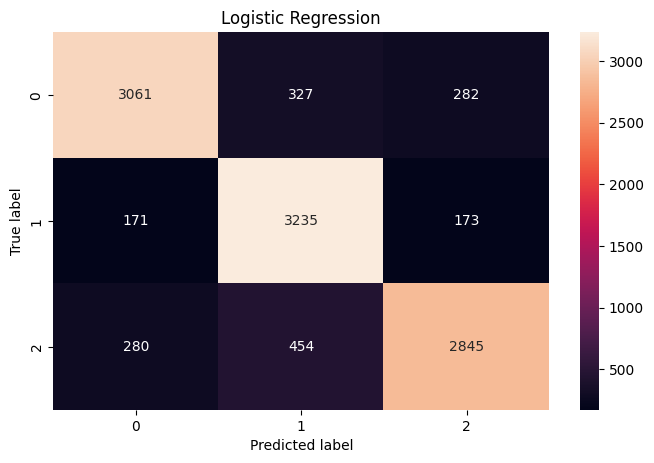

In [30]:
#Passing the model for evaluation
logistic_reg = model_eval(log_reg, 'Logistic Regression')

In [31]:
# Append the results to the comparison dataframe
comparison_df = comparison_df.append({'Model_Name': 'Logistic Regression', 'Accuracy': logistic_reg['accuracy']}, ignore_index=True)

###Pickling the model :)

Pickling is particularly useful when working with machine learning models because training a model can take a long time, and it's often useful to save the model so that you don't have to retrain it every time you want to use it. 

In [32]:
#Saving the trained Logistic Regression Model on the drive
pickle.dump(log_reg, open("/content/gdrive/MyDrive/Coronavirus Tweet Sentiment Analysis/Logistic_Regression_Model.pkl", "wb"))

###Random Forest Classifier

Random Forest Classifier is an ensemble learning method for classification. Random Forest Classifier can handle both categorical and numerical variables, making it a versatile algorithm for various types of classification problems. It is also less sensitive to outliers and noisy data compared to other algorithms. Random Forest Classifier is popularly used in natural language processing and text classification.

In [77]:
# Initialize the RandomForestClassifier
randomf_clf = RandomForestClassifier()
# Fit the classifier to the training data
randomf_clf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      3561
     Neutral       0.87      0.97      0.91      3543
    Positive       0.90      0.82      0.86      3724

    accuracy                           0.89     10828
   macro avg       0.89      0.89      0.88     10828
weighted avg       0.89      0.89      0.88     10828



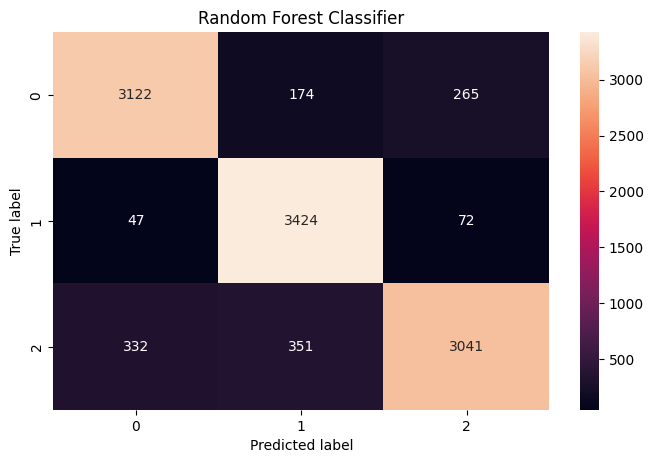

In [78]:
#Passing the model for evaluation
random_forest = model_eval(randomf_clf, 'Random Forest Classifier')

In [35]:
# Append the results to the comparison dataframe
comparison_df = comparison_df.append({'Model_Name': 'Random Forest Classifier', 'Accuracy': random_forest['accuracy']}, ignore_index=True)

In [36]:
#Saving the trained Random Forest Classifier Model on the drive
pickle.dump(randomf_clf, open("/content/gdrive/MyDrive/Coronavirus Tweet Sentiment Analysis/Random_Forest_Clf_Model.pkl", "wb"))

###Support Vector Classification (SVC)

Support Vector Machines (SVMs) are a type of supervised learning algorithm that can be used for both binary and multiclass classification. 

### OneVsOne Classifier

The OneVsOneClassifier is a strategy for multi-class classification problems. It works by training a separate binary classifier for each pair of classes, and then combining the results of all the classifiers to make a final prediction.


In [37]:
# Create an SVC classifier
svc = SVC(kernel='linear')
# Create the multiclass classifier
ovoclf = OneVsOneClassifier(svc)
# Fit the classifier on the training data
ovoclf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC(kernel='linear'))

              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      3670
     Neutral       0.84      0.92      0.88      3579
    Positive       0.88      0.82      0.85      3579

    accuracy                           0.87     10828
   macro avg       0.87      0.87      0.87     10828
weighted avg       0.87      0.87      0.87     10828



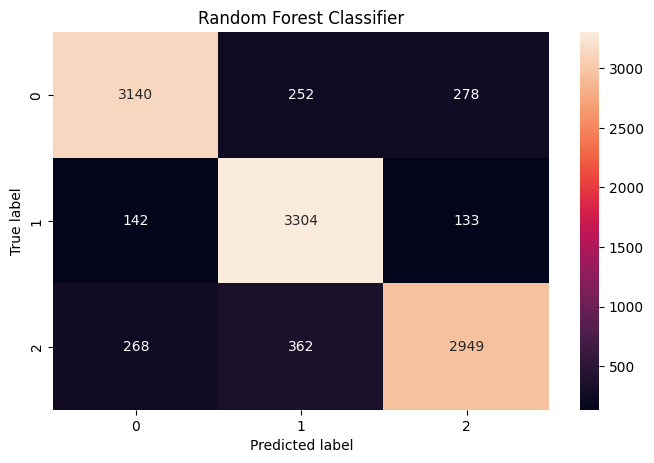

In [38]:
#Passing the model for evaluation
onevone_clf = model_eval(ovoclf, 'Random Forest Classifier')

In [39]:
# Append the results to the comparison dataframe
comparison_df = comparison_df.append({'Model_Name': 'OneVsOne Classifier ', 'Accuracy': onevone_clf['accuracy']}, ignore_index=True)

In [40]:
#Saving the trained Random Forest Classifier Model on the drive
pickle.dump(ovoclf, open("/content/gdrive/MyDrive/Coronavirus Tweet Sentiment Analysis/SVM_OneVsOneClassifier.pkl", "wb"))

###OneVsRest Classifier

The OneVsRestClassifier creates one binary classifier per class, where the class is treated as positive and all other classes are treated as negative. During prediction, the class with the highest score is chosen as the predicted class. 

In [41]:
# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)
# Use the OneVsRestClassifier wrapper to handle the multiclass classification
clf = OneVsRestClassifier(svm)
# Fit the classifier on the training data
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1, kernel='linear', random_state=42))

              precision    recall  f1-score   support

    Negative       0.89      0.86      0.87      3670
     Neutral       0.85      0.92      0.88      3579
    Positive       0.88      0.83      0.85      3579

    accuracy                           0.87     10828
   macro avg       0.87      0.87      0.87     10828
weighted avg       0.87      0.87      0.87     10828



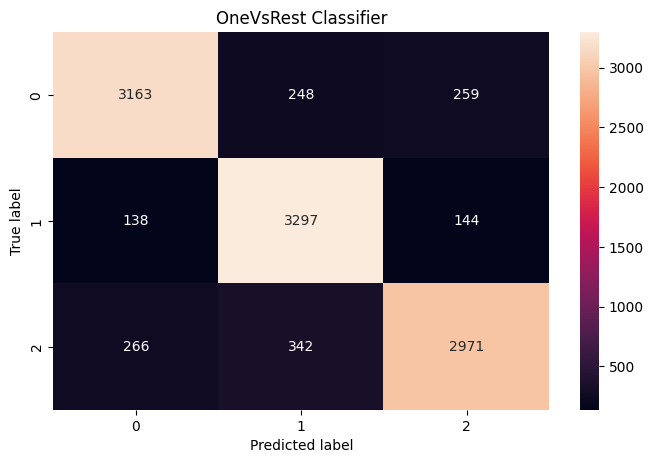

In [42]:
#Passing the model for evaluation
onevrest_clf = model_eval(clf, 'OneVsRest Classifier')

In [43]:
# Append the results to the comparison dataframe
comparison_df = comparison_df.append({'Model_Name': 'OneVsRest Classifier ', 'Accuracy': onevrest_clf['accuracy']}, ignore_index=True)

In [44]:
#Saving the trained Random Forest Classifier Model on the drive
pickle.dump(clf, open("/content/gdrive/MyDrive/Coronavirus Tweet Sentiment Analysis/SVM_OneVsRestClassifier.pkl", "wb"))

###MultinomialNB Classifier

The MultinomialNB classifier is a variation of the Naive Bayes algorithm for text classification. It is specifically designed for text data with discrete features, such as word counts in a document. The classifier uses a multinomial distribution for the features and assumes independence between the features. It is typically used for text classification tasks such as sentiment analysis and spam detection.

In [48]:
# Initialize the SVM classifier
NB_clf = MultinomialNB()
# Fit the classifier on the training data
NB_clf.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

    Negative       0.76      0.81      0.78      3670
     Neutral       0.84      0.76      0.79      3579
    Positive       0.74      0.76      0.75      3579

    accuracy                           0.77     10828
   macro avg       0.78      0.77      0.78     10828
weighted avg       0.78      0.77      0.78     10828



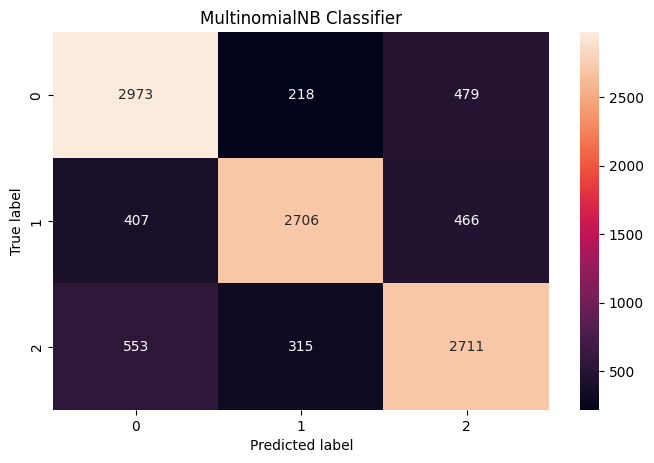

In [49]:
#Passing the model for evaluation
MultinomialNB_clf = model_eval(NB_clf, 'MultinomialNB Classifier')

In [50]:
# Append the results to the comparison dataframe
comparison_df = comparison_df.append({'Model_Name': 'MultinomialNB Classifier ', 'Accuracy': MultinomialNB_clf['accuracy']}, ignore_index=True)

In [51]:
#Saving the trained Random Forest Classifier Model on the drive
pickle.dump(clf, open("/content/gdrive/MyDrive/Coronavirus Tweet Sentiment Analysis/MultinomialNB_Classifier.pkl", "wb"))

###Note:

By handling the class imbalance we have seen aprrox. 7-10 % of increase in accuracy. So the choice of upsampling the minority classes was good. :)

In [52]:
comparison_df

,Model_Name,Accuracy
0,Logistic Regression,0.844200
1,Random Forest Classifier,0.880033
2,OneVsOne Classifier,0.867473
3,OneVsRest Classifier,0.870983
4,MultinomialNB Classifier,0.774843


##Conclusion and Recommendations
**Conclusion**

Twitter sentiment analysis is a process of determining the emotional tone behind a collection of tweets. The output of sentiment analysis is a sentiment score which can be positive, negative, or neutral. Twitter sentiment analysis can be used in various fields such as business, politics, and social media monitoring. In business, companies can use sentiment analysis to track public opinion about their brand, products, and services. In politics, sentiment analysis can be used to track public opinion about political candidates, parties, and policies. In social media monitoring, sentiment analysis can be used to track public opinion about current events, trending topics, and breaking news.

This study aims to us to analyze the sentiment which can be positive, negative, or neutral. So that it can be applied in required field.

The analysis yielded several key findings, including:
* The analysis suggested to make tweets sentiment positive or negative the requirement of words is more and on the other hand neutral tweets have comparatively less no of words required.
* Tweets with a negative sentiment and positive sentiment use more unique words compared to tweets with a neutral sentiment.
* By the countplot of number of tweets on particular date, we can figure out if theres any major news break or any factor that can effect the mass population. 

